# Import des outils / jeu de données

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
np.random.seed(0)
sns.set_theme()

In [ ]:
df = pd.read_csv(
    "data/train.csv",
    index_col="id",
)

# Présentation

## Jeu de données

### Lecture des données

### Présentation des variables

In [5]:
df.head()

,gravity,ph,osmo,cond,urea,calc,target
id,,,,,,,
0,1.013,6.19,443,14.8,124,1.45,0
1,1.025,5.40,703,23.6,394,4.18,0
2,1.009,6.13,371,24.5,159,9.04,0
3,1.021,4.91,442,20.8,398,6.63,1
4,1.021,5.53,874,17.8,385,2.21,1


In [6]:
print(f"Il y a {df.shape[1]} variables et {df.shape[0]} individus.")

Il y a 7 variables et 414 individus.


#### Variables

In [7]:
y = df.pop("target")
X = df.copy()

In [8]:
y.head()

id
0    0
1    0
2    0
3    1
4    1
Name: target, dtype: int64

In [9]:
X.head()

,gravity,ph,osmo,cond,urea,calc
id,,,,,,
0,1.013,6.19,443,14.8,124,1.45
1,1.025,5.40,703,23.6,394,4.18
2,1.009,6.13,371,24.5,159,9.04
3,1.021,4.91,442,20.8,398,6.63
4,1.021,5.53,874,17.8,385,2.21


# Découverte des données

## Analyse univariée

In [10]:
df.describe()

,gravity,ph,osmo,cond,urea,calc
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,1.017894,5.955459,651.545894,21.437923,278.657005,4.114638
std,0.006675,0.642260,234.676567,7.514750,136.442249,3.217641
min,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000
25%,1.012000,5.530000,455.250000,15.500000,170.000000,1.450000
50%,1.018000,5.740000,679.500000,22.200000,277.000000,3.130000
75%,1.022000,6.280000,840.000000,27.600000,385.000000,6.630000
max,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000


In [15]:
df.nunique()

gravity    28
ph         71
osmo       80
cond       65
urea       73
calc       85
dtype: int64

## Visualisation

### Variables numériques

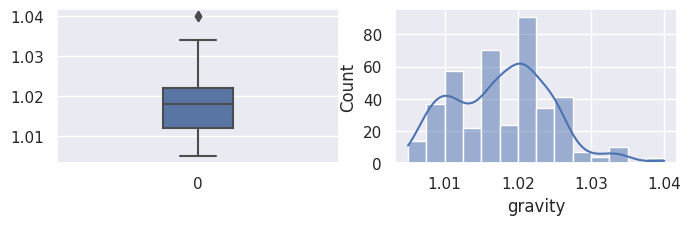

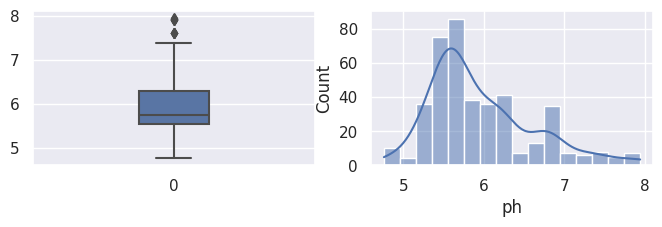

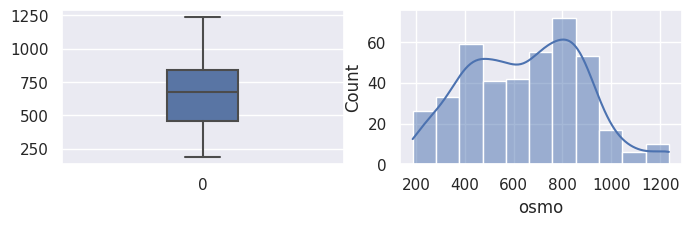

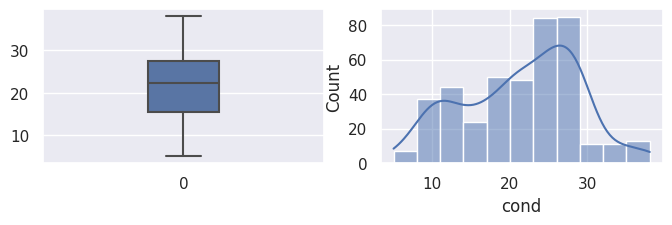

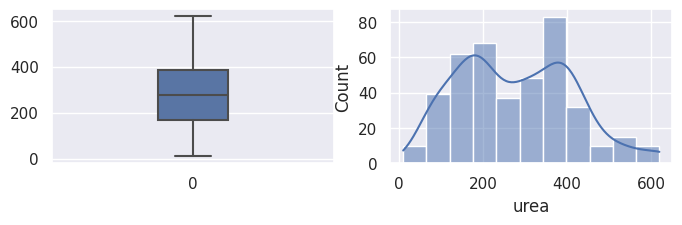

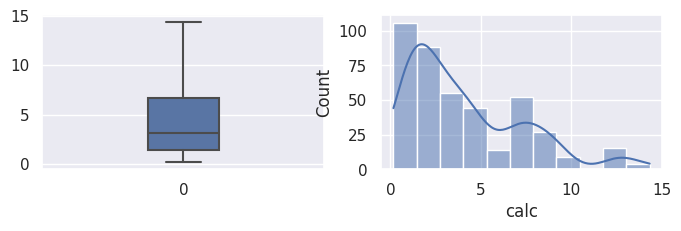

In [19]:
for var in X.columns:
    _, ax = plt.subplots(1, 2, figsize=(8, 2))
    sns.boxplot(df[var], width=0.25, ax=ax[0])
    sns.histplot(df[var], kde=True, ax=ax[1])
    plt.show()

<Axes: >

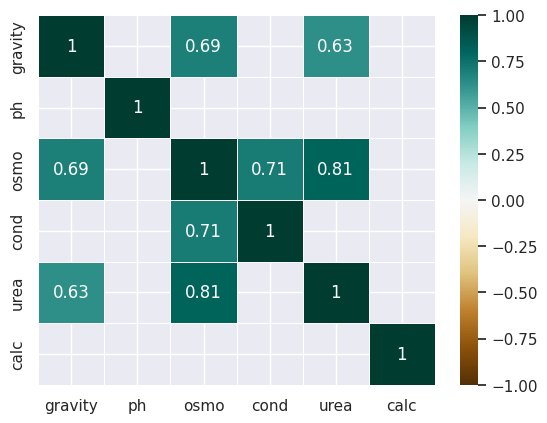

In [35]:
sns.heatmap(
    X.corr()[X.corr().abs() > 0.5],
    annot=True,
    cmap="BrBG",
    linewidths=0.5,
    vmax=1,
    vmin=-1,
)

In [39]:
df.isna().sum()

gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
dtype: int64

### Variable cible

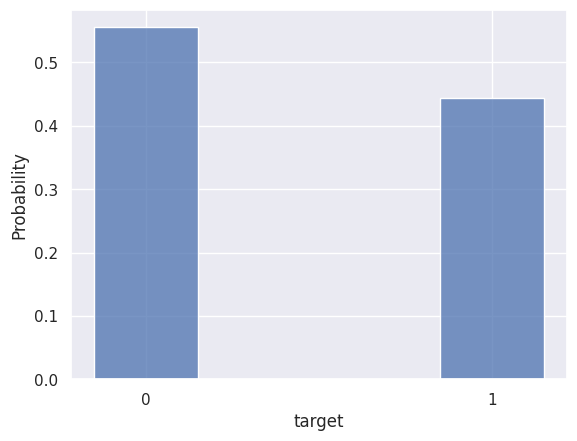

In [30]:
sns.histplot(y.astype(str), shrink=0.3, stat="probability")
plt.show()

In [32]:
y.value_counts(normalize=True)

0    0.555556
1    0.444444
Name: target, dtype: float64

In [33]:
y.value_counts()

0    230
1    184
Name: target, dtype: int64

### Variable cible en fonction des autres variables

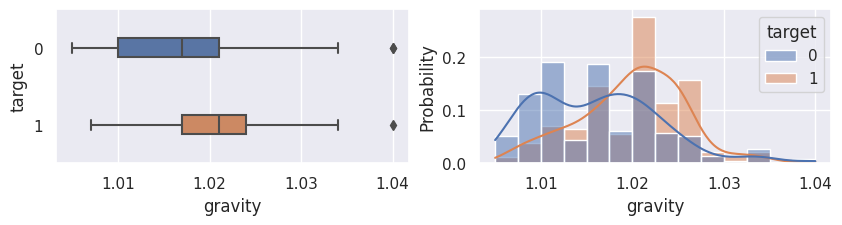

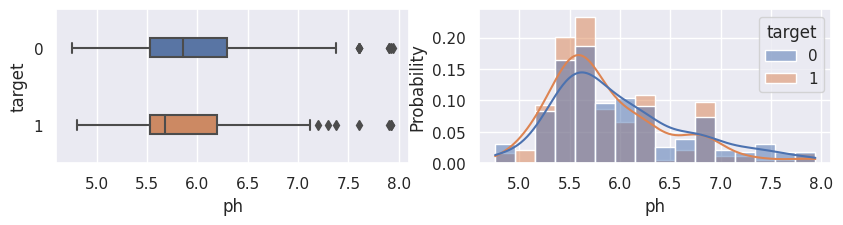

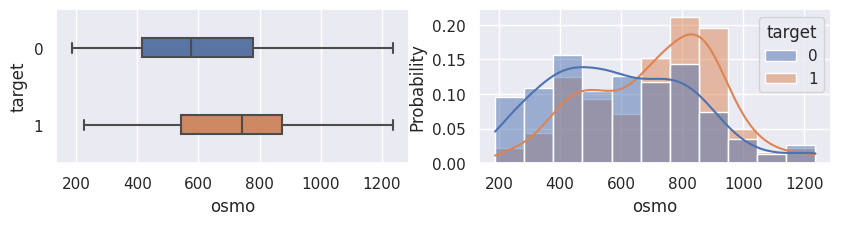

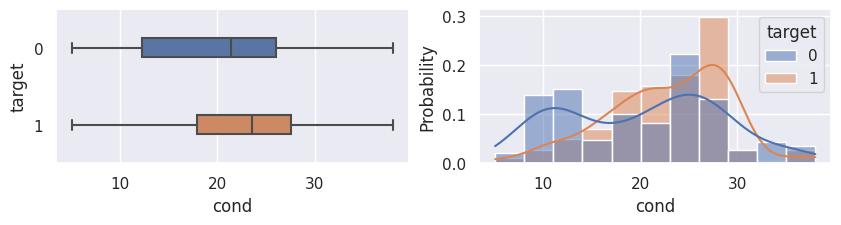

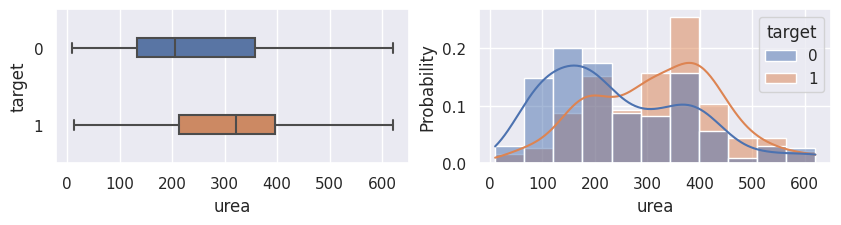

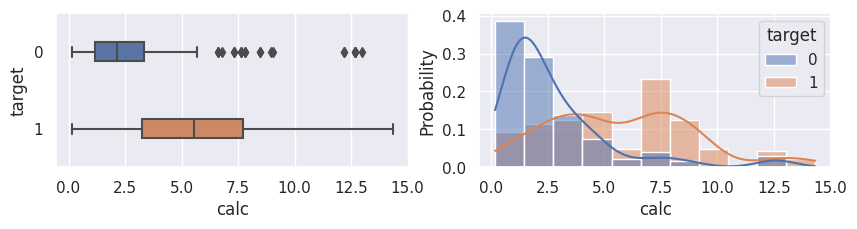

In [52]:
for var in X.columns:
    _, ax = plt.subplots(1, 2, figsize=(10, 2))
    sns.boxplot(x=X[var], y=y.astype(str), width=0.25, ax=ax[0])
    sns.histplot(
        x=X[var],
        kde=True,
        ax=ax[1],
        hue=y.astype(str),
        stat="probability",
        common_norm=False,
    )
    plt.show()

# Sauvegarde du Dataframe

In [ ]:
df.to_csv("data/data.csv")